In [1]:
import pandas as pd
import numpy as np
file = pd.read_csv('marketing_customer_analysis.csv')
file.shape

(9134, 24)

In [ ]:
file.head()

In [ ]:
file = file.drop(['Unnamed: 0'], axis=1)
file = file.rename(columns={'EmploymentStatus':'Employment Status'})

In [ ]:
file.head()

In [ ]:
file.dtypes

In [ ]:
file.select_dtypes('number')

In [ ]:
file.select_dtypes('object')

In [ ]:
#Numerical columns: Customer Lifetime Value, Income, Monthly Premium Auto,Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, Total Claim Amount 
#Categorical columns: State, Coverage, Education, Employment Status, Gender, Policy Type, Policy, Renew Offer Type, Sales Channel, Vehicle Class, Vehicle Size, Vehicle Type   


In [ ]:
file.isna().sum()

In [ ]:
#Months Since Last Claim: I've decided to do the mean of the rest of the values
mean_Months_Since_Last_Claim = file['Months Since Last Claim'].mean()
mean_Months_Since_Last_Claim
file['Months Since Last Claim'] = file['Months Since Last Claim'].fillna(mean_Months_Since_Last_Claim)

In [ ]:
#Number of complaints: I've decided to take the median because the range of values was very short
median_Num_Com = file['Number of Open Complaints'].median()
median_Num_Com
file['Number of Open Complaints'] = file['Number of Open Complaints'].fillna(median_Num_Com)



In [ ]:
#Response: I've decided to use the most common value
file['Response'].unique()
file['Response'].value_counts()

In [ ]:
file['Response'] = file['Response'].fillna('No')

In [ ]:
file['Vehicle Class'].unique()
file['Vehicle Class'].value_counts()

In [ ]:
#Vehicle Class: I've decided to use the most common value because it represents more than the 50% of the answers
file['Vehicle Class'] = file['Vehicle Class'].fillna('Four-Door Car')

In [ ]:
file['Vehicle Size'].unique()
file['Vehicle Size'].value_counts()

In [ ]:
#Vehicle Size: again, I've decided to use the most common value because it represents more than the 50% of the answers
file['Vehicle Size'] = file['Vehicle Size'].fillna('Medsize')

In [ ]:
file['State'].unique()
file['State'].value_counts()

In [ ]:
#Because I am not able to know the State and there are several options 
#so I could change the data, I've decided not to eliminate the NaN


In [ ]:
file['Vehicle Type'].unique()
file['Vehicle Type'].value_counts()

In [ ]:
#Finally, I've decided to eliminate Vehicle Type because half of them are A
#and the other half are NaN so it is irrelevant
file = file.drop(['Vehicle Type'], axis=1)


In [ ]:
file.isna().sum()

In [ ]:
#file['Effective To Date'] = pd.to_datetime(file['Effective To Date']
#file['Month'] = file['Effective To Date'].dt.month
#Last two lines do the same as the following function:
def ExtractMonth(file):
    file_dt = pd.to_datetime(file)
    file_m = file_dt.dt.month
    return file_m
file['Month'] = ExtractMonth(file['Effective To Date'])

In [ ]:
file.head()

In [ ]:
file['Month'].unique()
file['Month'].value_counts()

In [ ]:
#I will only filter the january and february data because march data do not exist
#but, as we have seen before, I will obtain all the values because they are only 1 and 2
file[(file['Month']==1) | (file['Month']==2) ]


In [ ]:
#Lab | Customer Analysis Round 3

In [ ]:
file.shape

In [ ]:
file.head()

In [ ]:
file.dtypes

In [ ]:
#Looking at the information we have above, I can say we have a dataframe with 25 columns which contain different type
#of data related with the clients of a cars insurance company 
#Customer: client code
#State: client state
#Customer Lifetime Value: the value that the client has for the company
#Response: if the client has it or not
#Coverage: type of coverage
#Education: grade of education
#Effective To Date: end date of the coverage
#Employment Status: if the client is working
#Gender: client gender
#Income: amount of income
#Location Code: code of the client location
#Marital Status: marital status of the client
#Monthly Premium Auto: premium payment amount
#Months Since Last Claim: months without claiming
#Months Since Policy Inception: months since the policy started
#Number of Open Complaints: Complaints that have not been solved
#Number of Policies: contracted policies
#Policy Type: type of policy that the client has 
#Policy: policy tipe code
#Renew Offer Type: offer offered to renew the policy
#Sales Channel: how the policy was sold
#Total Claim Amount: quantity of the claim required by the client
#Vehicle Class: type of the vehicle
#Vehicle Size: size of the vehicle
#Month: month extracted from the column: Effective To Date

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [ ]:
file['Response'].value_counts().plot(kind='bar', title='Response')
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot('Sales Channel', hue='Response', data=file)
plt.ylabel('Response by Sales Channel')

In [ ]:
file_new = file
file_new['Response_Rate'] = np.where(file_new.Response=='Yes',1,0)

In [ ]:
file_new.Response_Rate.value_counts()

In [ ]:
file_new.groupby('Sales Channel')['Response_Rate'].mean().plot.bar()                                           
plt.show

In [ ]:
print(file_new['Total Claim Amount'].max())    
print(file_new['Total Claim Amount'].min())    
print(file_new['Total Claim Amount'].mean())                                      

In [ ]:
def TotCA_div(x):
    if x <= 450:
        return 1
    elif x <= 900:
        return 2
    elif x <= 1350:
        return 3
    elif x <= 1800:
        return 4
    else:
        return 5

file_new['Total Claim Amount_bins'] = list(map(TotCA_div, file_new['Total Claim Amount']))

In [ ]:
file_new.groupby('Total Claim Amount_bins')['Response_Rate'].mean().plot.bar()                                           
index = np.arange(5)
plt.xticks(index, ("0-450", "451-900", "901-1350", "1351-1800", ">1800"))  
plt.show

In [ ]:
print(file_new['Income'].max())    
print(file_new['Income'].min())    
print(file_new['Income'].mean())

In [ ]:
def TotIn_div(x):
    if x <= 19000:
        return 1
    elif x <= 38000:
        return 2
    elif x <= 57000:
        return 3
    elif x <= 76000:
        return 4
    else:
        return 5

file_new['Income_bins'] = list(map(TotIn_div, file_new['Income']))

In [ ]:
file_new.groupby('Income_bins')['Response_Rate'].mean().plot.bar()
index = np.arange(5)
plt.xticks(index, ("0-19000", "19001-38000", "38001-57000", "57001-76000", ">76000"))  
plt.show

In [3]:
#Lab | Customer Analysis Round 4

In [4]:
numerical = file.select_dtypes('number')
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [5]:
categorical = file.select_dtypes('object')
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


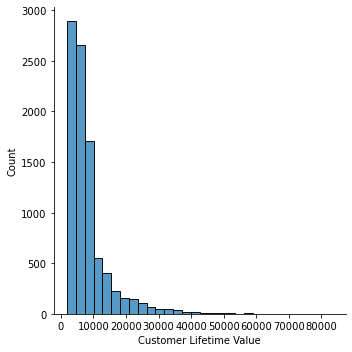

In [6]:
sns.displot(file['Customer Lifetime Value'], bins=30)
plt.show()

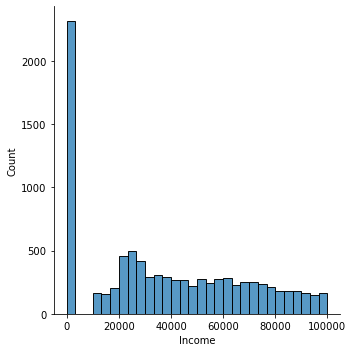

In [7]:
sns.displot(file['Income'], bins=30)
plt.show()

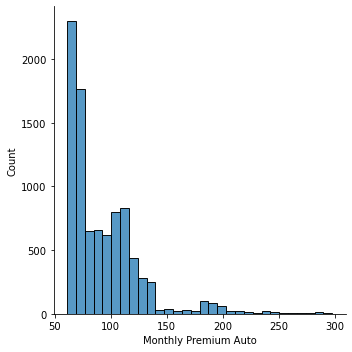

In [8]:
sns.displot(file['Monthly Premium Auto'], bins=30)
plt.show()

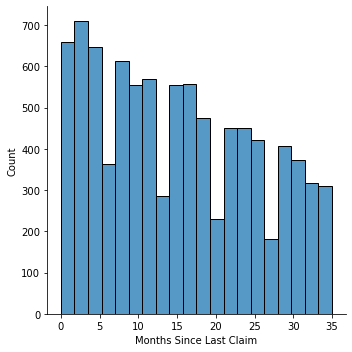

In [9]:
sns.displot(file['Months Since Last Claim'], bins=20)
plt.show()

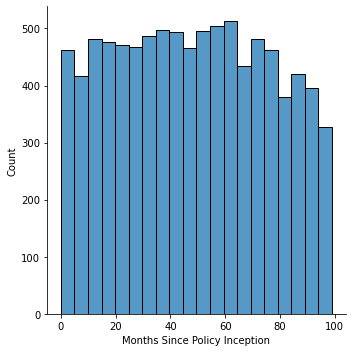

In [10]:
sns.displot(file['Months Since Policy Inception'], bins=20)
plt.show()

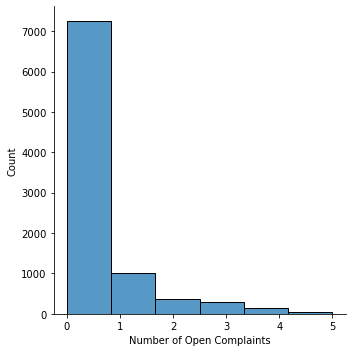

In [11]:
sns.displot(file['Number of Open Complaints'], bins=6)
plt.show()

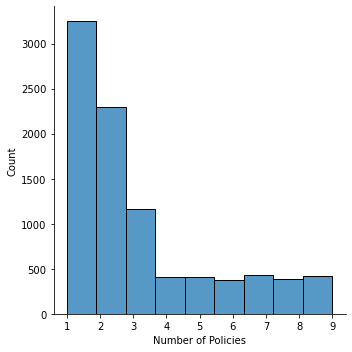

In [12]:
sns.displot(file['Number of Policies'], bins=9)
plt.show()

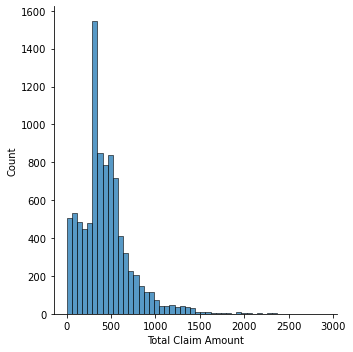

In [13]:
sns.displot(file['Total Claim Amount'], bins=50)
plt.show()

In [14]:
#Total Claim Amount could look like a normal distribution

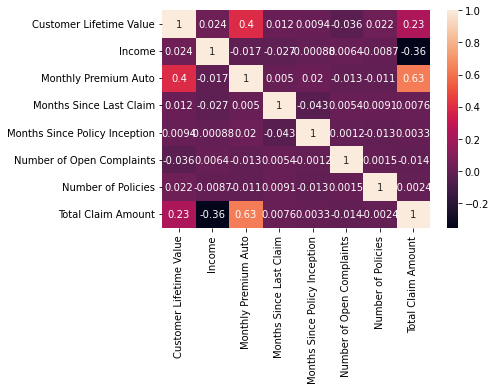

In [15]:
correlations_matrix = file.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [16]:
#I will drop no features because there is no pair of 
#features that have a high correlation 

In [17]:
#Lab | Customer Analysis Round 5

In [18]:
#Target variable: total_claim_amount

In [19]:
display(file.head())
file.shape

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

y = file['Total Claim Amount']
X = file.drop(['Total Claim Amount'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [21]:
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [22]:
#MinMaxScaler
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
fileMinMax = pd.DataFrame(x_normalized, columns=X_num.columns)
fileMinMax.head()

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


In [23]:
#StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
fileStSc = pd.DataFrame(x_standardized, columns=X_num.columns)
fileStSc.head()

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


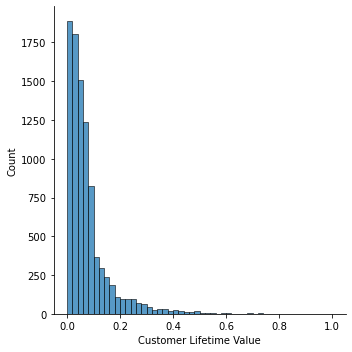

None


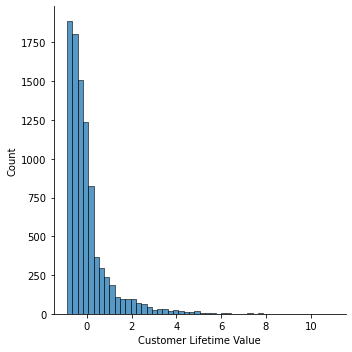

In [24]:
sns.displot(fileMinMax['Customer Lifetime Value'], bins=50)
print(plt.show())
sns.displot(fileStSc['Customer Lifetime Value'], bins=50)
plt.show()

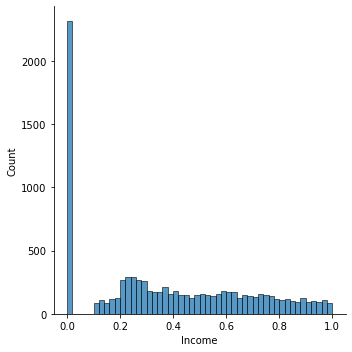

None


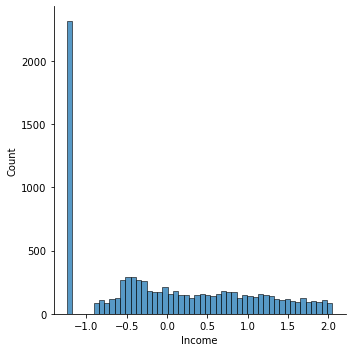

In [25]:
sns.displot(fileMinMax['Income'], bins=50)
print(plt.show())
sns.displot(fileStSc['Income'], bins=50)
plt.show()

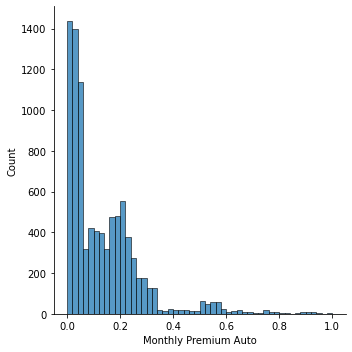

None


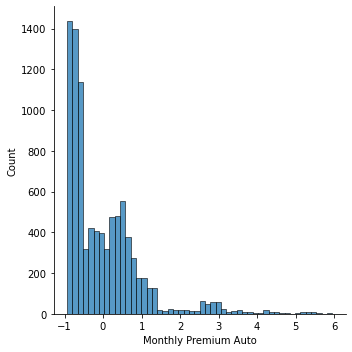

In [26]:
sns.displot(fileMinMax['Monthly Premium Auto'], bins=50)
print(plt.show())
sns.displot(fileStSc['Monthly Premium Auto'], bins=50)
plt.show()

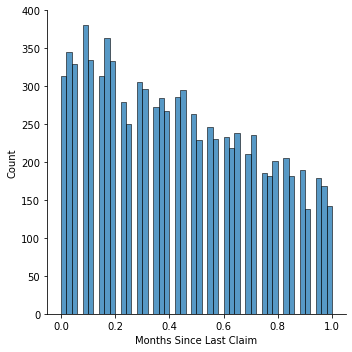

None


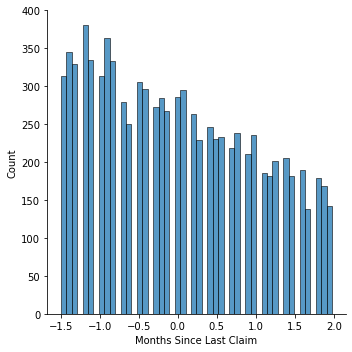

In [27]:
sns.displot(fileMinMax['Months Since Last Claim'], bins=50)
print(plt.show())
sns.displot(fileStSc['Months Since Last Claim'], bins=50)
plt.show()

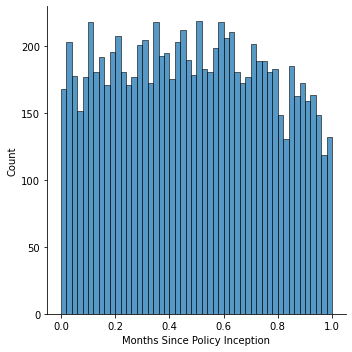

None


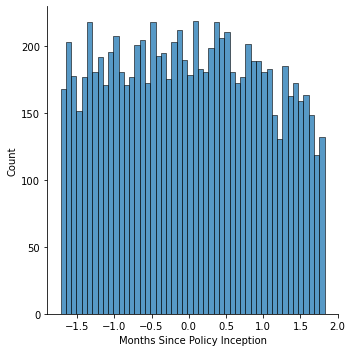

In [28]:
sns.displot(fileMinMax['Months Since Policy Inception'], bins=50)
print(plt.show())
sns.displot(fileStSc['Months Since Policy Inception'], bins=50)
plt.show()

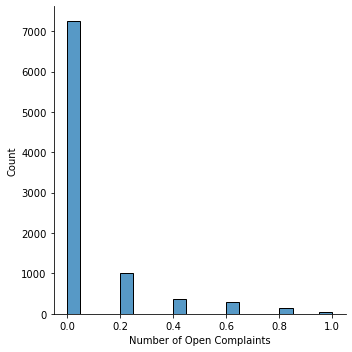

None


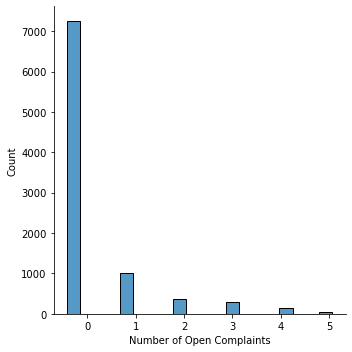

In [29]:
sns.displot(fileMinMax['Number of Open Complaints'], bins=20)
print(plt.show())
sns.displot(fileStSc['Number of Open Complaints'], bins=20)
plt.show()

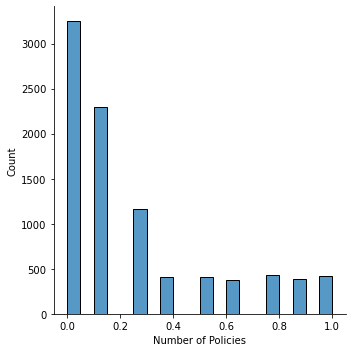

None


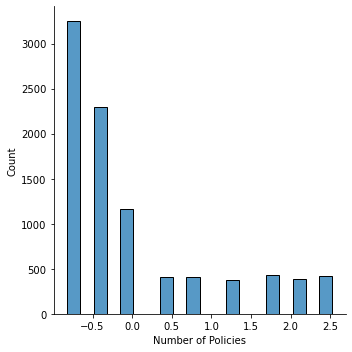

In [30]:
sns.displot(fileMinMax['Number of Policies'], bins=20)
print(plt.show())
sns.displot(fileStSc['Number of Policies'], bins=20)
plt.show()

In [31]:
#As we can observe in the graphics, the difference between both scalers is almost inexistent